In [31]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [36]:
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='E:/Users/Jarod/Stuff/School Stuff/Grad School/Spring 2022/STA5635/datasets/cifar10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, shuffle=True)
for x,y in trainloader:
    break
print(x.shape)
mx=torch.mean(x,dim=(0,2,3),keepdim=True)
sx=torch.std(x,dim=(0,2,3),keepdim=True)
x=(x-mx)/sx
print(mx.shape)
print(sx)

Files already downloaded and verified
torch.Size([1024, 3, 32, 32])
torch.Size([1, 3, 1, 1])
tensor([[[[0.4895]],

         [[0.4782]],

         [[0.5155]]]])


In [27]:
x =np.loadtxt ("E:/Users/Jarod/Stuff/School Stuff/Grad School/Spring 2022/STA5635/datasets/abalone/abalone.csv", delimiter=',')
y=torch.tensor(x[:,7]).float()
x=torch.tensor(x[:,0:7]).float()
mx=torch.mean(x,axis=0)
sx=torch.std(x,axis=0)
my=torch.mean(y)
x=(x-mx)/sx
y=y-my
print(x.shape,y.shape,mx.shape)

torch.Size([4177, 7]) torch.Size([4177]) torch.Size([7])


In [28]:
from torch.utils.data import TensorDataset,DataLoader
x=x.to(device)
y=y.to(device)
trainset = TensorDataset(x,y)
trainloader = DataLoader(trainset, batch_size=256,shuffle=True)

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 16)  
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net=net.to(device)
print(net(x).shape)

torch.Size([4177, 1])


[10] loss: 5.673
[20] loss: 5.484
[30] loss: 5.427
[40] loss: 5.392
[50] loss: 5.367
[60] loss: 5.347
[70] loss: 5.331
[80] loss: 5.317
[90] loss: 5.305
[100] loss: 5.295


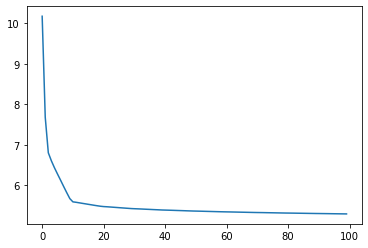

In [30]:
import torch.optim as optim

net = Net()
net=net.to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
losses=[]
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    nobs=0
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs).squeeze()
        loss = torch.mean((outputs-labels)**2)
        #print(inputs.shape,outputs.shape,labels.shape,loss.shape)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()*inputs.shape[0]
        nobs+=inputs.shape[0]
    losses.append(running_loss/nobs)
    if epoch % 10 == 9:    # print every 10 epochs
        print(f'[{epoch + 1}] loss: {running_loss/nobs:.3f}')
        optimizer = optim.SGD(net.parameters(), lr=0.001/(epoch+1), momentum=0.9, weight_decay=0.0001)


plt.plot(losses)

In [102]:
y = np.loadtxt("c:/datasets/uci/gisette/gisette_train.labels", delimiter=',')
x = np.loadtxt("c:/datasets/uci/gisette/gisette_train.data")
yt = np.loadtxt("c:/datasets/uci/gisette/gisette_valid.labels", delimiter=',')
xt = np.loadtxt("c:/datasets/uci/gisette/gisette_valid.data")
print(x.shape,y.shape)

(6000, 5000) (6000,)


In [119]:
y = np.loadtxt("c:/datasets/uci/madelon/madelon_train.labels", delimiter=',')
x = np.loadtxt("c:/datasets/uci/madelon/madelon_train.data")
yt = np.loadtxt("c:/datasets/uci/madelon/madelon_valid.labels", delimiter=',')
xt = np.loadtxt("c:/datasets/uci/madelon/madelon_valid.data")
print(x.shape,y.shape)

(2000, 500) (2000,)


In [113]:
y = np.loadtxt("c:/datasets/uci/dexter/dexter_train.labels", delimiter=',')
x = np.loadtxt("c:/datasets/uci/dexter/dexter_train.csv", delimiter=',')
yt = np.loadtxt("c:/datasets/uci/dexter/dexter_valid.labels", delimiter=',')
xt = np.loadtxt("c:/datasets/uci/dexter/dexter_valid.csv", delimiter=',')
print(x.shape,y.shape)

(300, 20000) (300,)


In [120]:
x=torch.tensor(x).float()
y=torch.tensor(y).float()
xt=torch.tensor(xt).float()
yt=torch.tensor(yt).float()
sx=torch.std(x,dim=0)
x=x[:,sx>0]
xt=xt[:,sx>0]
sx=sx[sx>0]
print(x.shape)
mx=torch.mean(x,dim=0)
x=(x-mx)/sx
xt=(xt-mx)/sx
print(mx.shape)
n=x.shape[0]
nt=xt.shape[0]
x=torch.cat((torch.ones(n,1),x),dim=1)
print(x.shape)
xt=torch.cat((torch.ones(nt,1),xt),dim=1)
n=x.shape[0]
nt=xt.shape[0]
d=x.shape[1]

torch.Size([2000, 500])
torch.Size([500])
torch.Size([2000, 501])


In [121]:
y0=y.clone()
y0[y0<0]=0
yt0=yt.clone()
yt0[yt0<0]=0

In [122]:
x=x.to(device)
y=y.to(device)
y0=y0.to(device)
xt=xt.to(device)
yt=yt.to(device)
yt0=yt0.to(device)

10 0.377 0.4033333333333333
30 0.345 0.42833333333333334
100 0.30900000000000005 0.43333333333333335
300 0.26949999999999996 0.43166666666666664
500 0.26049999999999995 0.42166666666666663


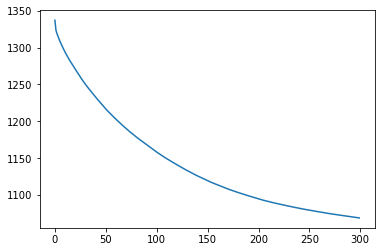

In [123]:
from sklearn.metrics import accuracy_score
def loss(h,y):
    l1=torch.sum(torch.log(1+torch.exp(-y.view(-1,1)*h)),dim=0)
    return l1

def err(x,y,w,w0):
    py=x@w+w0
    py[py>0]=1
    py[py<=0]=0
    return 1-accuracy_score(y.cpu(),py.cpu())

ks=[10,30,100,300,500]
Niter=10
n,d=x.shape
errs=[]
errst=[]
for k in ks:
    h=torch.zeros(n,device=device)
    b=torch.zeros(d,device=device)
    w0=0
    losses=[]
    for i in range(k):
        p=1/(1+torch.exp(-h)).view(-1,1)
        w=p*(1-p)
        z=1/p # for y==1
        z[y0==0]=-1/(1-p[y0==0])
        sw=torch.sum(w)
        zbar=torch.sum(z*w)/sw
        xbar=torch.sum(w*x,dim=0)/sw
        den=torch.sum(w*(x-xbar.view(1,-1))**2,dim=0)
        b1=torch.sum(w*(z-zbar)*(x-xbar.view(1,-1)),dim=0)/(den+0.000001)
        b0=zbar-b1*xbar
        hi=b0+b1.view(1,-1)*x
        newh=h.view(-1,1)+hi
        L=loss(newh,y)
        j=torch.argmin(L)
        h=newh[:,j]
        # selected weak learner is b0[j]+b1[j]*x[:,j]
        w0=w0+b0[j]
        b[j]=b[j]+b1[j]
        losses.append(L[j].item())
        #print(i,sel.shape[0])
    if k==300:
        plt.plot(losses)
    e=err(x,y0,b,w0)
    et=err(xt,yt0,b,w0)
    errs.append(e)
    errst.append(et)
    print(k,e,et)

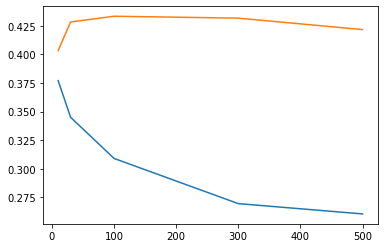

In [124]:
plt.plot(ks,errs)
plt.plot(ks,errst)